In [1]:
import numpy as np
import argparse
import os, time

from pykin.utils import plot_utils as p_utils

from pytamp.benchmark import Rearrange1
from pytamp.benchmark.rearrange1 import make_scene
from pytamp.search.mcts_for_rearragement import MCTS_rearrangement
from pytamp.utils import point_cloud_utils as pc_utils

def get_parser():
    parser = argparse.ArgumentParser(description="Test Rearragement 1.")
    parser.add_argument("--budgets", metavar="T", type=int, default=50, help="Horizon")
    parser.add_argument("--max_depth", metavar="H", type=int, default=10, help="Max depth")
#     parser.add_argument("--seed", metavar="i", type=int, default=7, help="A random seed")
    parser.add_argument("--seed", metavar="i", type=int, default=15, help="A random seed")
#     parser.add_argument("--seed", metavar="i", type=int, default=144, help="A random seed")
    parser.add_argument(
        "--algo",
        metavar="alg",
        type=str,
        default="bai_perturb",
        choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
        help="Choose one (bai_perturb, bai_ucb, uct)",
    )
    parser.add_argument(
        "--debug_mode", default=False, type=lambda x: (str(x).lower() == "true"), help="Debug mode"
    )
#     parser.add_argument("--box_number", metavar="N", type=int, default=6, help="Box Number(6 or less)")
    try:
        args = parser.parse_args() #call from command line
    except:
        args = parser.parse_args(args=[]) #call from notebook
    return args 

args = get_parser() 

debug_mode = args.debug_mode
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
np.random.seed(seed)

object_names, init_scene, goal_scene = make_scene()
rearrangement1 = Rearrange1('panda', object_names, init_scene, goal_scene, is_pyplot=False)

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []

# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)


usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/juju/.local/share/jupyter/runtime/kernel-49887fc2-cb33-475b-8f56-34e3e6e84935.json


*********************** Logical States ***********************
OrderedDict([('ben_cube0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('can0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('can1',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('milk0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('cereal0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('table',
              {'static': True,
               'support': [Object(name=ben_cube0, pos=[0.71251618 0.06234933 0.83529998]),
                           Object(name=can0, pos=[ 0.57217421 -0.08168322  0.83506603]),
                           Object(name=can1, pos=[ 0.39330443 -0.07652336  0.83508997]),
                           Object(name=milk0, pos=[0.58642011 0.07288141 0.83236691]),
                           Object(name=cereal0, pos=[

In [2]:
c = 2.5
idx = 0
mcts = MCTS_rearrangement(
        scene_mngr=rearrangement1.scene_mngr,
        init_scene=rearrangement1.init_scene,
        sampling_method=args.algo,
        budgets=args.budgets,
        max_depth=args.max_depth,
        c=c,
        debug_mode=args.debug_mode,
    )
mcts.only_optimize_1 = False

In [3]:
start_time = time.time()
for i in range(budgets):
    print(
        f"\n[{idx+1}/{len(c_list)}] Benchmark: {rearrangement1.scene_mngr.scene.bench_num}, Algo: {algo}, C: {c}, Seed: {seed}"
    )
    mcts.do_planning_rearrange(i)

    print("########### Running time : ", time.time()- start_time, "##############")
    final_level_1_values.append(mcts.values_for_level_1)



[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 15
=========== Search iteration : 1 ===========
[Action] Rearr can1
placed another place not goal
[Reward] S(0) -> A(5) -> S'(11) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(11) -> A(14) -> S'(20) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(20) -> A(27) -> S'(29) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(29) -> A(30) -> S'(38) Reward : -1
[Action] Rearr can1
placed another place not goal
[Reward] S(38) -> A(41) -> S'(47) Reward : -1
[Action] Rearr milk0
Good Action
[Reward] S(47) -> A(53) -> S'(56) Reward : 1.429
[Action] Rearr can0
placed another place not goal
[Reward] S(56) -> A(59) -> S'(64) Reward : -1
[Action] Rearr can1
Good Action
[Reward] S(64) -> A(68) -> S'(72) Reward : 1.111
[Action] Rearr can0
Good Action
[Reward] S(72) -> A(76) -> S'(80) Reward : 1.0
[Action] Rearr milk0
Bad Action
[Reward] S(80) -> A(84) -> S'(87) Reward 

[Action] Rearr ben_cube0
Good Action
[Reward] S(364) -> A(366) -> S'(372) Reward : 2.5
[Action] Rearr can0
Good Action
[Reward] S(372) -> A(374) -> S'(380) Reward : 2.0
[Action] Rearr can1
Bad Action
[Reward] S(380) -> A(382) -> S'(387) Reward : -4.0
[Action] Rearr milk0
Good Action
[Reward] S(387) -> A(391) -> S'(393) Reward : 1.429
[Action] Rearr cereal0
placed another place not goal
[Reward] S(393) -> A(398) -> S'(400) Reward : -1
[Action] Rearr can0
Bad Action
[Reward] S(400) -> A(402) -> S'(406) Reward : -2.5
[Action] Rearr can1
Good Action
[Reward] S(406) -> A(409) -> S'(413) Reward : 1.0
[Action] Rearr can0
placed another place not goal
[Reward] S(413) -> A(415) -> S'(419) Reward : -1
Exceeded the maximum depth!!
########### Running time :  5.312959671020508 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 15
=========== Search iteration : 7 ===========
[Action] Rearr milk0
placed another place not goal
[Reward] S(0) -> A(7) -> S'(420) Reward : -1
[Action] R

placed another place not goal
[Reward] S(726) -> A(733) -> S'(735) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(735) -> A(739) -> S'(743) Reward : 0.909
Exceeded the maximum depth!!
########### Running time :  9.407395839691162 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 15
=========== Search iteration : 12 ===========
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(0) -> A(1) -> S'(88) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(88) -> A(89) -> S'(744) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(744) -> A(745) -> S'(753) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(753) -> A(761) -> S'(762) Reward : 2.0
[Action] Rearr can0
Good Action
[Reward] S(762) -> A(766) -> S'(771) Reward : 1.667
[Action] Rearr can1
Good Action
[Reward] S(771) -> A(775) -> S'(779) Reward : 1.429
[Action] Rearr can0
Bad Action
[Reward] S(779) -> A(782) -> S'(786) Reward : -2.857
[Actio

placed another place not goal
[Reward] S(496) -> A(501) -> S'(1059) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(1059) -> A(1062) -> S'(1067) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(1067) -> A(1073) -> S'(1075) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(1075) -> A(1076) -> S'(1083) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(1083) -> A(1084) -> S'(1091) Reward : -1
[Action] Rearr milk0
Bad Action
[Reward] S(1091) -> A(1096) -> S'(1099) Reward : -2.857
[Action] Rearr cereal0
placed another place not goal
[Reward] S(1099) -> A(1106) -> S'(1108) Reward : -1
[Action] Rearr milk0
Good Action
[Reward] S(1108) -> A(1115) -> S'(1116) Reward : 1.0
[Action] Rearr can0
placed another place not goal
[Reward] S(1116) -> A(1119) -> S'(1124) Reward : -1
Exceeded the maximum depth!!
########### Running time :  14.157639741897583 ##############

[1/10] Benchmark: 0, Algo: bai_

[Action] Rearr cereal0
placed another place not goal
[Reward] S(1389) -> A(1395) -> S'(1397) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(1397) -> A(1400) -> S'(1405) Reward : -1
[Action] Rearr can1
placed another place not goal
[Reward] S(1405) -> A(1408) -> S'(1413) Reward : -1
[Action] Rearr milk0
Bad Action
[Reward] S(1413) -> A(1418) -> S'(1420) Reward : -2.857
[Action] Rearr can0
Good Action
[Reward] S(1420) -> A(1424) -> S'(1428) Reward : 1.111
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(1428) -> A(1429) -> S'(1437) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(1437) -> A(1441) -> S'(1445) Reward : -1
Exceeded the maximum depth!!
########### Running time :  18.108790159225464 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 15
=========== Search iteration : 23 ===========
[Action] Rearr cereal0
placed another place not goal
[Reward] S(0) -> A(9) -> S'(543) Reward : -1
[Action] Rear

[Action] Rearr can1
Good Action
[Reward] S(1696) -> A(1700) -> S'(1705) Reward : 1.111
[Action] Rearr can0
placed another place not goal
[Reward] S(1705) -> A(1708) -> S'(1713) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(1713) -> A(1720) -> S'(1721) Reward : 0.909
Exceeded the maximum depth!!
########### Running time :  21.849308490753174 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 15
=========== Search iteration : 28 ===========
[Action] Rearr cereal0
Good Action
[Reward] S(0) -> A(10) -> S'(614) Reward : 5.0
[Action] Rearr ben_cube0
Good Action
[Reward] S(614) -> A(616) -> S'(1722) Reward : 3.333
[Action] Rearr can0
Good Action
[Reward] S(1722) -> A(1724) -> S'(1730) Reward : 2.5
[Action] Rearr ben_cube0
Bad Action
[Reward] S(1730) -> A(1731) -> S'(1737) Reward : -5.0
[Action] Rearr can1
placed another place not goal
[Reward] S(1737) -> A(1739) -> S'(1744) Reward : -1
[Action] Rearr cereal0
Bad Action
[Reward] S(1744) -> A(1750) -> S'(1751) Rew

[Action] Rearr ben_cube0
Good Action
[Reward] S(2013) -> A(2015) -> S'(2021) Reward : 0.909
Exceeded the maximum depth!!
########### Running time :  25.855892181396484 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 15
=========== Search iteration : 33 ===========
[Action] Rearr cereal0
placed another place not goal
[Reward] S(0) -> A(9) -> S'(543) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(543) -> A(546) -> S'(2022) Reward : 3.333
[Action] Rearr cereal0
Good Action
[Reward] S(2022) -> A(2030) -> S'(2031) Reward : 2.5
[Action] Rearr ben_cube0
Good Action
[Reward] S(2031) -> A(2033) -> S'(2039) Reward : 2.0
[Action] Rearr can1
Good Action
[Reward] S(2039) -> A(2042) -> S'(2046) Reward : 1.667
[Action] Rearr milk0
placed another place not goal
[Reward] S(2046) -> A(2049) -> S'(2052) Reward : -1
[Action] Rearr ben_cube0
Bad Action
[Reward] S(2052) -> A(2053) -> S'(2057) Reward : -2.857
[Action] Rearr milk0
placed another place not goal
[Reward] S(2057) ->

placed another place not goal
[Reward] S(614) -> A(617) -> S'(2305) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(2305) -> A(2306) -> S'(2313) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(2313) -> A(2317) -> S'(2320) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(2320) -> A(2323) -> S'(2328) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(2328) -> A(2329) -> S'(2336) Reward : -1
[Action] Rearr can1
placed another place not goal
[Reward] S(2336) -> A(2339) -> S'(2344) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(2344) -> A(2349) -> S'(2352) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(2352) -> A(2353) -> S'(2360) Reward : -1
[Action] Rearr can1
placed another place not goal
[Reward] S(2360) -> A(2363) -> S'(2367) Reward : -1
Exceeded the maximum depth!!
########### Running time :  30.487051248550415 ###########

[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(2615) -> A(2616) -> S'(2623) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(2623) -> A(2628) -> S'(2631) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(2631) -> A(2634) -> S'(2639) Reward : -1
[Action] Rearr can1
placed another place not goal
[Reward] S(2639) -> A(2642) -> S'(2647) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(2647) -> A(2648) -> S'(2655) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(2655) -> A(2656) -> S'(2663) Reward : -1
Exceeded the maximum depth!!
########### Running time :  34.39450716972351 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 15
=========== Search iteration : 44 ===========
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(0) -> A(1) -> S'(88) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(88) -> A(89) -> S'(744)

[Action] Rearr can1
placed another place not goal
[Reward] S(2925) -> A(2929) -> S'(2933) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(2933) -> A(2936) -> S'(2941) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(2941) -> A(2943) -> S'(2950) Reward : 1.0
[Action] Rearr cereal0
placed another place not goal
[Reward] S(2950) -> A(2957) -> S'(2959) Reward : -1
Exceeded the maximum depth!!
########### Running time :  38.269965410232544 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 15
=========== Search iteration : 49 ===========
[Action] Rearr cereal0
placed another place not goal
[Reward] S(0) -> A(9) -> S'(543) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(543) -> A(549) -> S'(2960) Reward : -1
[Action] Rearr can1
Good Action
[Reward] S(2960) -> A(2966) -> S'(2969) Reward : 2.5
[Action] Rearr milk0
Good Action
[Reward] S(2969) -> A(2975) -> S'(2978) Reward : 2.0
[Action] Rearr can0
Good Action
[Rew

In [4]:
max_level_1_value = mcts.get_max_value_level_1()
print(max_level_1_value, mcts.history_level_1_dict)

########## level 1 ##########
if mcts.history_level_1_dict:
    j, max_value_nodes = mcts.get_max_value_nodes_level_1()
    print(f"Result {j} : ", max_value_nodes)
    print("state num :", len(max_value_nodes))
#     mcts.render_rearr("_", max_value_nodes)

12.311904761904762 {0: {'nodes': [0, 8, 496, 498, 505, 510, 513, 518, 521, 528, 529, 532, 536, 540, 542], 'value': 12.311904761904762}, 1: {'nodes': [0, 1, 88, 91, 1558, 1560, 1567, 1572, 1575, 1582, 1583, 1588, 1590, 1593, 1596], 'value': 11.145238095238096}}
Result 0 :  [0, 8, 496, 498, 505, 510, 513, 518, 521, 528, 529, 532, 536, 540, 542]
state num : 15


# contact_graspnet module

In [5]:
from pytamp.utils.contact_graspnet_utils import Grasp_Using_Contact_GraspNet

gg = Grasp_Using_Contact_GraspNet()

2023-07-12 17:43:53.688876: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


TypeError: __init__() missing 1 required positional argument: 'action'

# Make Contact_graspNet's GraspEstimator

In [ ]:
# import os
# import sys
# import argparse
# import numpy as np
# import time
# import glob
# import cv2

# import tensorflow.compat.v1 as tf
# tf.disable_eager_execution()
# physical_devices = tf.config.list_physical_devices('GPU')

# if physical_devices:
#     try:
#         tf.config.experimental.set_virtual_device_configuration(
#                     physical_devices[0],
#                     [tf.config.LogicalDeviceConfiguration(memory_limit=6000)])  # 4GB 제한
#     except  RuntimeError as e:
#         print(e)

# home_path = os.path.expanduser('~')
# sys.path.append(os.path.join(home_path , 'contact_graspnet/contact_graspnet'))

# import config_utils
# from data import regularize_pc_point_count, depth2pc, load_available_input_data
# from contact_graspnet import contact_graspnet
# from contact_grasp_estimator import GraspEstimator
from visualization_utils import visualize_grasps, show_image

# parser = argparse.ArgumentParser()
# parser.add_argument('--ckpt_dir', default='checkpoints/scene_test_2048_bs3_hor_sigma_001', help='Log dir [default: checkpoints/scene_test_2048_bs3_hor_sigma_001]')
# parser.add_argument('--np_path', default='test_data/7.npy', help='Input data: npz/npy file with keys either "depth" & camera matrix "K" or just point cloud "pc" in meters. Optionally, a 2D "segmap"')
# parser.add_argument('--png_path', default='', help='Input data: depth map png in meters')
# parser.add_argument('--K', default=None, help='Flat Camera Matrix, pass as "[fx, 0, cx, 0, fy, cy, 0, 0 ,1]"')
# parser.add_argument('--z_range', default=[0.2,1.8], help='Z value threshold to crop the input point cloud')
# parser.add_argument('--local_regions', action='store_true', default=False, help='Crop 3D local regions around given segments.')
# parser.add_argument('--filter_grasps', action='store_true', default=False,  help='Filter grasp contacts according to segmap.')
# parser.add_argument('--skip_border_objects', action='store_true', default=False,  help='When extracting local_regions, ignore segments at depth map boundary.')
# parser.add_argument('--forward_passes', type=int, default=1,  help='Run multiple parallel forward passes to mesh_utils more potential contact points.')
# parser.add_argument('--segmap_id', type=int, default=0,  help='Only return grasps of the given object id')
# parser.add_argument('--arg_configs', nargs="*", type=str, default=[], help='overwrite config parameters')

# FLAGS = parser.parse_args(args=[])

# global_config = config_utils.load_config(FLAGS.ckpt_dir, batch_size=FLAGS.forward_passes, arg_configs=FLAGS.arg_configs)

# ## Config를 받아서 GraspEstimatorr Class를 받아옴. 
# grasp_estimator = GraspEstimator(global_config)


# Make Network 

In [ ]:
# grasp_estimator.build_network()


# # Add ops to save and restore all the variables.
# saver = tf.train.Saver(save_relative_paths=True)

# # Create a session
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# config.allow_soft_placement = True
# sess = tf.Session(config=config)


In [ ]:
# checkpoint_dir = '/home/juju/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/'

# # Load weights
# # grasp_estimator.load_weights(sess, saver, checkpoint_dir, mode='test')
# saver.restore(sess, '/home/juju/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-144144')

# Get point cloud 

old한 방법임. 아래 synthetic scene에서 더 간단하게 get함. 

In [ ]:
# # max_value_nodes = mcts.history_level_1_optimal_nodes[1]
# state_list = [i for _, i in enumerate(max_value_nodes) if not _ % 2]
# action_list = [i for _, i in enumerate(max_value_nodes) if _ % 2]

# for i in range(len(max_value_nodes)//2):
# #     print("current state : ", max_value_nodes[2*i])
# #     print("action : ", max_value_nodes[2*i + 1])
# #     print("next state : ", max_value_nodes[2*(i+1)])
    
#     print("manipulate object", mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name'])
#     current_state_pc, current_pc_segments, current_pc_color, current_count = pc_utils.get_obj_point_clouds(
#                                 rearrangement1.init_scene,
#                                 mcts.tree.nodes[max_value_nodes[2*i]]['state'],
#                                 mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']
#                                 )
#     next_state_pc, next_pc_segments, next_pc_color,  next_count = pc_utils.get_obj_point_clouds(
#                                 rearrangement1.init_scene,
#                                 mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],
#                                 mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']
#                                 )
    
#     print()
    
#     if i==3:
#         break

# obj_to_manipulate = mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']
# obj_to_manipulate

In [ ]:
# table_point_cloud, table_color =  pc_utils.get_support_space_point_cloud(rearrangement1.init_scene, rearrangement1.scene_mngr.scene)

# all_color = np.vstack([current_pc_color, next_pc_color])
# all_color = np.vstack([all_color, table_color])
# all_color = np.vstack([all_color, table_color])


# current_state_pc = np.vstack([current_state_pc, table_point_cloud])
# next_state_pc = np.vstack([next_state_pc, table_point_cloud])

# obj_to_manipulate = mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']
# combined_pc = pc_utils.get_combined_point_cloud(mcts.tree.nodes[max_value_nodes[2*i]]['state'],
#                                         mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],
#                                         obj_to_manipulate,
#                                         current_state_pc,
#                                         next_state_pc,
#                                         next_count
#                                        )


# mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']

In [ ]:
# ##### %matplotlib inline
# import trimesh
# from trimesh.util import concatenate

# # table_point_cloud =  pc_utils.get_support_space_point_cloud(rearrangement1.init_scene, rearrangement1.scene_mngr.scene)
# # all_pc = np.vstack([combined_pc, table_point_cloud])


# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# print(len(next_state_pc))
# print(mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name'])

# #################### 
# # 포인트 클라우드를 렌더링
# colors = np.random.randint(0, 255, (1, 3), dtype=np.uint8)  # RGB colors (0-255)

# all_pc, shift_xy, cTn = combined_pc

# pc_full = trimesh.points.PointCloud(all_pc,  colors=colors)
# scene = trimesh.Scene(pc_full)
# # Set the camera viewpoint

# # Set point size and color
# scene.point_size = 5.0  # Increase point size to make them more visible

# # Show the scene
# scene.show()

# Synthetic scene making and get point cloud 

In [ ]:
# from pytamp.utils.point_cloud_utils import get_combined_pc_from_mixed_scene
i = 2

obj_to_manipulate = mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']
print(obj_to_manipulate)

# in rearr
mcts.rearr_action.get_combined_pc_from_mixed_scene(
                                                     next_scene=mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],\
                                                     current_scene=mcts.tree.nodes[max_value_nodes[2*i]]['state'],\
                                                     obj_to_manipulate=obj_to_manipulate
                                                     )


In [ ]:
# in pc_utils
pc, pc_segments, pc_color, count = pc_utils.get_obj_point_clouds(
                            rearrangement1.init_scene,
                            mcts.rearr_action.scene_mngr.scene,
                            mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']
                            )
# in pc_utils
table_point_cloud, table_color =  pc_utils.get_support_space_point_cloud(rearrangement1.init_scene, rearrangement1.scene_mngr.scene)

# in pc_utils
all_pc = np.vstack([pc, table_point_cloud])
all_color = np.vstack([pc_color, table_color])

# fig, ax = p_utils.init_3d_figure(name="Level wise 1")
# mcts.rearr_action.scene_mngr.render_objects(ax)
# p_utils.plot_basis(ax)
# mcts.rearr_action.show()

mcts.rearr_action.scene_mngr.scene.objs


In [83]:
##### %matplotlib inline
import trimesh
from trimesh.util import concatenate

# table_point_cloud =  pc_utils.get_support_space_point_cloud(rearrangement1.init_scene, rearrangement1.scene_mngr.scene)
# all_pc = np.vstack([combined_pc, table_point_cloud])

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print(obj_to_manipulate)
# print(mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name'])

#################### 
# 포인트 클라우드를 렌더링
colors = np.random.randint(0, 255, (1, 3), dtype=np.uint8)  # RGB colors (0-255)

pc_full = trimesh.points.PointCloud(all_pc,  colors=colors)
scene = trimesh.Scene(pc_full)

# Set point size and color
scene.point_size = 5.0  # Increase point size to make them more visible

# Show the scene
scene.show()

milk0


# Change Point clouds from world coord to camera coord

In [84]:
from pykin.utils.transform_utils import get_inverse_homogeneous

# # in pytamp 
# T_cam = np.array([[ 6.12323400e-17, -8.66025404e-01,  5.00000000e-01,
#          1.60000008e-01],
#        [ 1.00000000e+00,  5.30287619e-17, -3.06161700e-17,
#          6.34369494e-01],
#        [-0.00000000e+00,  5.00000000e-01,  8.66025404e-01,
#          1.63132538e+00],
#        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
#          1.00000000e+00]])

# w_T_cam = rearrangement1.table_pose.h_mat @ T_cam 
# w_T_cam = w_T_cam.dot(
#             trimesh.transformations.euler_matrix(np.pi, 0, 0)
#         )

# cam_T_w = get_inverse_homogeneous(w_T_cam)
# ones_arr = np.full((len(all_pc), 1), 1)
# w_pc = np.hstack((all_pc, ones_arr))

# cam_pc =  np.dot(cam_T_w, w_pc.T).T

# # next_pc_segment도 변경해줘 
# ones_arr = np.full((len(pc_segments[obj_to_manipulate]), 1), 1)
# w_pc = np.hstack((pc_segments[obj_to_manipulate], ones_arr))

# pc_segments[obj_to_manipulate] =  np.dot(cam_T_w, w_pc.T).T
gg.get_pc


In [86]:
pc_segments

{'milk0': array([[ 0.28508109, -0.14186418,  0.97605851,  1.        ],
        [ 0.30085108, -0.13424099,  1.06172612,  1.        ],
        [ 0.26066617, -0.2015916 ,  0.96886466,  1.        ],
        ...,
        [ 0.29543037, -0.12264841,  1.01074839,  1.        ],
        [ 0.27783633, -0.20745687,  0.93630231,  1.        ],
        [ 0.29694945, -0.17525238,  1.00389606,  1.        ]])}

## Manipulation 하고싶은 object에 대해서만 Cube 생성함. 

In [87]:
import numpy as np
import trimesh

pc_regions, _ = gg.grasp_estimator.extract_3d_cam_boxes(cam_pc[:,:3], pc_segments, min_size=0.4)
pc_region_1 = pc_regions[obj_to_manipulate]

# pc_region_1 = gg.get_region_to_manipulate(cam_pc[:,:3], pc_segments, min_size=0.4, obj_name=obj_to_manipulate)

colors = np.random.randint(0, 255, (1, 3), dtype=np.uint8)  # RGB colors (0-255)

# Home
rand_xy = np.random.random((100,3))/100
# z = np.ones((10,1))*0.8
# rand_xy = np.hstack([rand_xy,z])
pc_region_test = trimesh.points.PointCloud(np.vstack([pc_region_1, rand_xy]),  colors=colors)

scene = trimesh.Scene(pc_region_test)

print(pc_regions[obj_to_manipulate].shape, obj_to_manipulate)
scene.point_size=2.0
scene.show()


Extracted Region Cube Size:  0.4
(20000, 3) milk0


In [23]:
# all_pc = cam_pc[:,:3]
# print(all_pc.shape, pc_regions[obj_to_manipulate].shape, obj_to_manipulate)

pred_grasps_cam, scores, contact_pts, gripper_openings = {}, {}, {}, {}

pred_grasps_cam, scores, contact_pts, gripper_openings = gg.generate_grasp(pc_region_1, pc_segments[obj_to_manipulate], obj_to_manipulate)

(33000, 3) (20000, 3) milk0


2023-07-12 14:36:21.393122: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-07-12 14:36:21.724660: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-07-12 14:36:22.242334: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-07-12 14:36:22.519058: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


Generated 32 grasps for object milk0


# generate grasp on obj_to_manipulation

In [25]:
# forward_passes = 1
# filter_grasps = True 
# local_regions = True 
# # for name_ in pc_segments.keys():
# #     pred_grasps_cam[name_], scores[name_], contact_pts[name_], gripper_openings[name_] = gg.grasp_estimator.predict_grasps(gg.sess, pc_regions[obj_to_manipulate], convert_cam_coords=True, forward_passes=forward_passes)

# pred_grasps_cam[obj_to_manipulate], scores[obj_to_manipulate], contact_pts[obj_to_manipulate], gripper_openings[obj_to_manipulate] = gg.grasp_estimator.predict_grasps(gg.sess, pc_regions[obj_to_manipulate], convert_cam_coords=True, forward_passes=forward_passes)

# filter grasps

In [26]:
# segment_keys = contact_pts.keys()
# print(contact_pts[obj_to_manipulate].shape)
# for k in segment_keys:
#     if np.any(pc_regions[k]) and np.any(contact_pts[k]):
#         segment_idcs = gg.grasp_estimator.filter_segment(contact_pts[k], pc_segments[k], thres=0.005)
        
#         pred_grasps_cam[k] = pred_grasps_cam[k][segment_idcs]
#         scores[k] = scores[k][segment_idcs]
#         contact_pts[k] = contact_pts[k][segment_idcs]        
#         try:
#             gripper_openings[k] = gripper_openings[k][segment_idcs]
#         except:
#             print('skipped gripper openings {}'.format(gripper_openings[k]))
#         if local_regions and np.any(pred_grasps_cam[k]):
#             print('Generated {} grasps for object {}'.format(len(pred_grasps_cam[k]), k))            
#     else:
#         print('skipping obj {} since  np.any(pc_segments[k]) {} and np.any(contact_pts[j]) is {}'.format(k, np.any(pc_regions[k]), np.any(contact_pts[j])))
        
        


In [42]:
# test_ = {}
# test_score = {}
# idx = np.where(scores[obj_to_manipulate]>0.3)
# test_[obj_to_manipulate] = pred_grasps_cam[obj_to_manipulate][idx]
# test_score[obj_to_manipulate] = scores[obj_to_manipulate][idx]

In [27]:
visualize_grasps(
            all_pc, pred_grasps_cam, scores, plot_opencv_cam=True, pc_colors=all_color
        )
# visualize_grasps(
#             all_pc, test_, test_score, plot_opencv_cam=True, pc_colors=all_color
#         )

Visualizing...takes time


# Change camera coord to world coord 

생성된 grasp은 camera coord 기준으로 생성되어 있음. 즉, cam_T_g

이를 world coord 기준으로 바꿔야함. -> w_T_cam * cam_T_g

In [28]:
from pytamp.utils.heuristic_utils import get_heuristic_eef_pose

def collision_check_using_contact_graspnet(pred_grasps):
    collision_free_grasps = []
    for grasps in pred_grasps:
        mcts.rearr_action.scene_mngr.set_gripper_pose(grasps)
        if not mcts.rearr_action._collide(is_only_gripper=True):
            collision_free_grasps.append(grasps)
     
    return np.array(collision_free_grasps)


pred_grasps_world = {}
pred_grasps_world_augment = {}
pred_grasps_cam_augment = {}
collision_free_grasps = [] 
# Z축으로 90도 돌려야함. 
z_90_matrix = np.array([[0,-1,0,0],
                        [1,0,0,0],
                        [0,0,1,0],
                        [0,0,0,1]])

pred_grasps_cam_augment[obj_to_manipulate] = pred_grasps_cam[obj_to_manipulate] @ z_90_matrix

# Next scene 기준으로 바꾸긴 했음...!! 
pred_grasps_world[obj_to_manipulate] = w_T_cam @ pred_grasps_cam[obj_to_manipulate]
print("Generated Grasp in world coord :", pred_grasps_world[obj_to_manipulate].shape)

# Collision check using only pred_result not consider augment
collision_free_grasps = collision_check_using_contact_graspnet(pred_grasps_world[obj_to_manipulate])
print("Collision free grasps step 1 : ", collision_free_grasps.shape)

if not len(collision_free_grasps):
    pred_grasps_world_augment[obj_to_manipulate] = w_T_cam @ pred_grasps_cam_augment[obj_to_manipulate]
    print("Augment 1 _z axis 90' rotation ", pred_grasps_world_augment[obj_to_manipulate].shape, pred_grasps_world[obj_to_manipulate].shape)
    
    collision_free_grasps = collision_check_using_contact_graspnet(pred_grasps_world_augment[obj_to_manipulate])
    print("Collision free grasps step 2 : ", collision_free_grasps.shape)
    
    
augmented_grasps = []
if not len(collision_free_grasps):
    pred_grasps_world_augment[obj_to_manipulate] = np.vstack([pred_grasps_world_augment[obj_to_manipulate], pred_grasps_world[obj_to_manipulate]])
    for grasps in pred_grasps_world_augment[obj_to_manipulate]:
        mcts.rearr_action.scene_mngr.set_gripper_pose(grasps)
        tcp_pose = mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose()

        for tcp_pose_ in get_heuristic_eef_pose(tcp_pose):
            eef_pose_ = mcts.rearr_action.scene_mngr.scene.robot.gripper.compute_eef_pose_from_tcp_pose(tcp_pose_)
            mcts.rearr_action.scene_mngr.set_gripper_pose(eef_pose_)
            augmented_grasps.append(eef_pose_)

if augmented_grasps:
    augmented_grasps = np.array(augmented_grasps)
    print("Augment 2 y axis rotation from -pi/3 ~ pi/3 : ", augmented_grasps.shape)
    pred_grasps_world_augment[obj_to_manipulate] = augmented_grasps
    
    collision_free_grasps = collision_check_using_contact_graspnet(pred_grasps_world_augment[obj_to_manipulate])
    print("Collision free grasps step 3 : ", collision_free_grasps.shape)

Generated Grasp in world coord : (32, 4, 4)
Collision free grasps step 1 :  (0,)
Augment 1 _z axis 90' rotation  (32, 4, 4) (32, 4, 4)
Collision free grasps step 2 :  (0,)
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (192, 4, 4)
Collision free grasps step 3 :  (5, 4, 4)


# Visualize predicted grasps on next_scene 

In [29]:
# fig, ax = p_utils.init_3d_figure(name="Level wise 1")
# # mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'])

# for grasps in pred_grasps_world_augment[obj_to_manipulate] :
#     mcts.rearr_action.scene_mngr.set_gripper_pose(grasps)
#     mcts.rearr_action.scene_mngr.render_axis(ax, grasps)
# #     mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    
# mcts.rearr_action.scene_mngr.render_objects(ax)
# p_utils.plot_basis(ax)
# mcts.rearr_action.show()

# Get Mixed Scene for Collision check 

Not collid :  5 Collide : 187


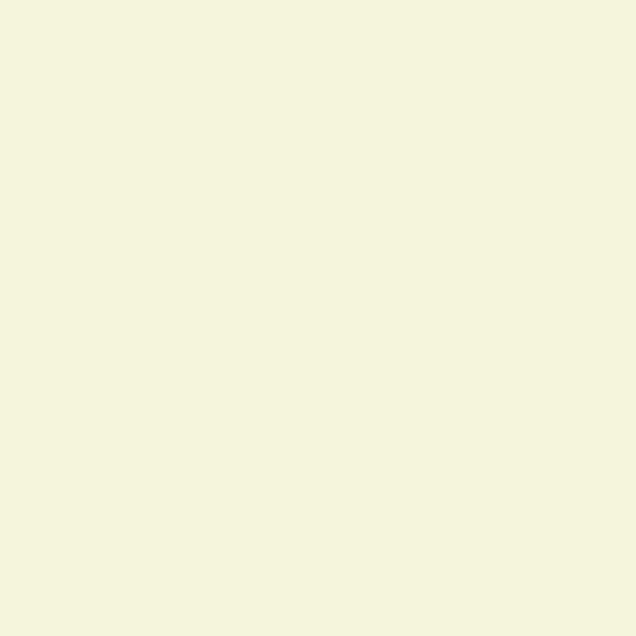

In [30]:
fig, ax = p_utils.init_3d_figure(name="Level wise 1")
c = 0 
n= 0 

for grasps in collision_free_grasps:
    mcts.rearr_action.scene_mngr.set_gripper_pose(grasps)
    mcts.rearr_action.scene_mngr.render_gripper(ax)
    mcts.rearr_action.scene_mngr.render_axis(ax, grasps)


mcts.rearr_action.scene_mngr.render_objects(ax)
p_utils.plot_basis(ax)
mcts.rearr_action.show()

print('Not collid : ', len(collision_free_grasps), "Collide :", len(augmented_grasps) - len(collision_free_grasps) )

# Collision check on the synthetic scene

In [30]:
for name in mcts.rearr_action.scene_mngr.scene.objs:
    print(name)


table
ben_cube0
can0
can1
milk0
cereal0
table_current
ben_cube0_current
can0_current
can1_current
milk0_current
cereal0_current


# Remove some objects in synthetic scene

In [31]:
mcts.rearr_action.remove_mixed_scene()

In [32]:
for i in mcts.rearr_action.scene_mngr.scene.objs:
    print(i)

table
ben_cube0
can0
can1
milk0
cereal0


In [ ]:
from pykin.utils.transform_utils import get_inverse_homogeneous

T_cam = np.array([[ 6.12323400e-17, -8.66025404e-01,  5.00000000e-01,
         1.60000008e-01],
       [ 1.00000000e+00,  5.30287619e-17, -3.06161700e-17,
         6.34369494e-01],
       [-0.00000000e+00,  5.00000000e-01,  8.66025404e-01,
         1.63132538e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

w_T_cam = rearrangement1.table_pose.h_mat @ T_cam 
w_T_cam = w_T_cam.dot(
            trimesh.transformations.euler_matrix(np.pi, 0, 0)
        )

cam_T_w = get_inverse_homogeneous(w_T_cam)
ones_arr = np.full((len(all_pc), 1), 1)
w_pc = np.hstack((all_pc, ones_arr))

cam_pc =  np.dot(cam_T_w, w_pc.T).T

# next_pc_segment도 변경해줘 
ones_arr = np.full((len(next_pc_segments[obj_to_manipulate]), 1), 1)
w_pc = np.hstack((next_pc_segments[obj_to_manipulate], ones_arr))

next_pc_segments[obj_to_manipulate] =  np.dot(cam_T_w, w_pc.T).T
